In [47]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Import Deep Learning Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import applications
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing import image

# import cv2

import warnings
warnings.filterwarnings('ignore')

# Check TensorFlow version
print("TensorFlow version:", tf.__version__)

# Sample TensorFlow operation to verify installation
a = tf.constant([1.0, 2.0, 3.0])
b = tf.constant([4.0, 5.0, 6.0])
c = a + b
print("TensorFlow operation result:", c.numpy())


TensorFlow version: 2.16.2
TensorFlow operation result: [5. 7. 9.]


In [48]:
directory_train = './Data/Train'
directory_validation = './Data/Val'
directory_test = './Data/Prediction'

In [49]:
# Data agumentation and pre-processing using tensorflow
gen = ImageDataGenerator(
    rescale=1./255.,
    horizontal_flip = True,
    vertical_flip = True
)

In [50]:
# Mount Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

# Update the directory path
# directory_train = '/content/drive/My Drive/Covid19_Dataset/Train'

# Data augmentation and pre-processing using tensorflow
gen = ImageDataGenerator(
    rescale=1./255.,
    horizontal_flip = True,
    vertical_flip = True
)

train_generator = gen.flow_from_directory(
    directory = directory_train,
    color_mode="rgb",
    target_size = (331,331), # image height , image width
    class_mode="categorical",
    batch_size=8,
    shuffle=True
)


Found 288 images belonging to 2 classes.


In [51]:
# Data augmentation and pre-processing using tensorflow
gen = ImageDataGenerator(
    rescale=1./255.,
    horizontal_flip = True,
    vertical_flip = True
)
validation_generator = gen.flow_from_directory(
    directory = directory_validation, # Use updated path
    color_mode="rgb",
    target_size = (331,331), # image height , image width
    class_mode="categorical",
    batch_size=8,
    shuffle=True
)

Found 60 images belonging to 2 classes.


In [52]:
x, y = next(train_generator)
x.shape

(8, 331, 331, 3)

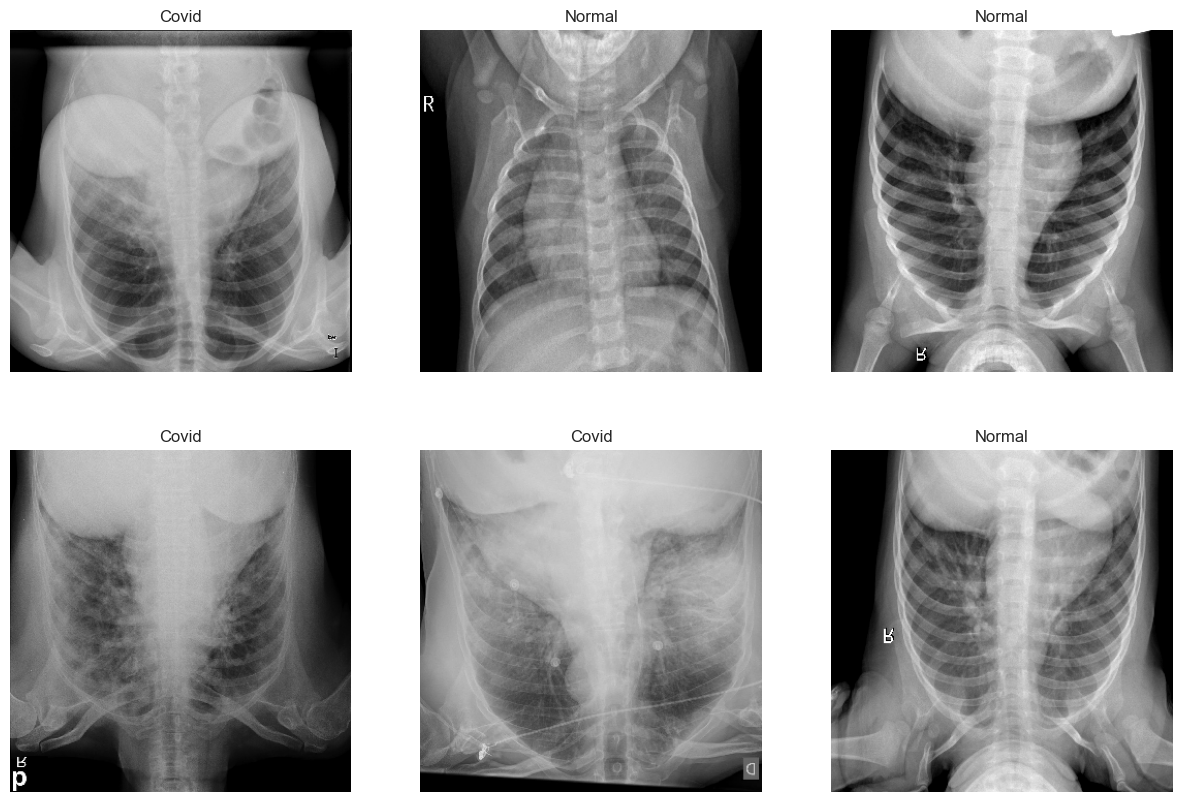

In [56]:
a = train_generator.class_indices
class_names = list(a.keys()) # storing class/breed names in a list

def plot_images(img,labels):
    plt.figure(figsize=[15,10])
    for i in range(6):
        plt.subplot(2,3,i+1)
        plt.imshow(img[i])
        plt.title(class_names[np.argmax(labels[i])])
        plt.axis('off')

plot_images(x,y)

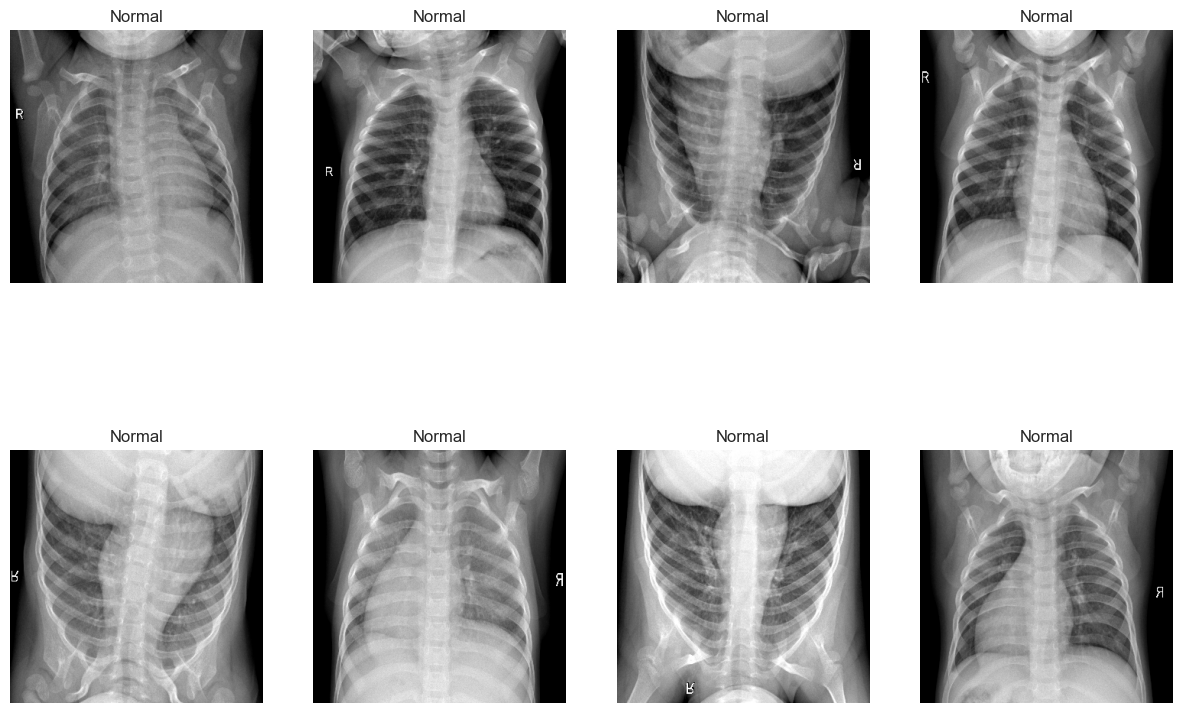

In [57]:
def extract_and_plot_normal_images(generator, num_images=8):
    """
    Extracts and plots normal images from a data generator.

    Args:
        generator: A data generator that yields batches of images and labels.
        num_images: The number of normal images to extract and plot.
    """
    normal_images = []
    normal_label = generator.class_indices['Normal']  # Get the index for 'Normal' class

    while len(normal_images) < num_images:
        images, labels = next(generator)
        for i in range(len(labels)):
            # Check if the label corresponds to 'Normal' class
            if np.argmax(labels[i]) == normal_label:
                normal_images.append(images[i])
                if len(normal_images) >= num_images:
                    break

    # Plot the extracted normal images
    plt.figure(figsize=(15, 10))
    for i in range(min(num_images, len(normal_images))):
        plt.subplot(2, 4, i + 1)
        plt.imshow(normal_images[i])
        plt.title('Normal')
        plt.axis('off')
    plt.show()

# Call the function to extract and plot 8 normal images
extract_and_plot_normal_images(train_generator)
